In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy import integrate

from utils import *
from AnalyseDefectsMinimal import AnalyseDefectsMinimal

In [ ]:
def gen_analysis_dict_minimal(LL, mode,):

    dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd', \
              suffix = "short", priority = -1, LX = LL, Nframes = 200, Ninfo = 2000)
    dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd_l', \
                suffix = "l", priority = 0, LX = LL, Nframes = 200, Ninfo = 5000)
    dvery_long = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd_vl',\
                    suffix = "vl", priority = 3, LX = LL, Nframes = 500, Ninfo = 10000)

    defect_list = [dshort, dlong, dvery_long,] if mode == 'all' else [dshort]
    return defect_list

def gen_analysis_dict_noise(LL):

    dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd_vl', \
              suffix = "n05", priority = 1, LX = LL, Nframes = 500, Ninfo = 10000)
    dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sdn20', \
                suffix = "sdn20", priority = 0, LX = LL, Nframes = 500, Ninfo = 10000)
    dvery_long = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sdn50',\
                    suffix = "n50", priority = -1, LX = LL, Nframes = 500, Ninfo = 10000)

    return [dshort, dlong, dvery_long,]

def plot_defects_per_activity(obj, activity, ax = None, Ndataset = 0, stationarity_dict = {}, alpha = 0.55):
        
        output_path = obj.output_paths[Ndataset]

        act_idx = list(obj.act_list[Ndataset]).index(activity)   
        Nframes = obj.Nframes[Ndataset]

        try:
            defect_arr_av = obj.get_arrays_av(Ndataset = Ndataset)[0] 
        except:
            print('Defect array not found. Analyse defects first.')
            return

        if ax is None:
            fig, ax = plt.subplots(figsize=(12, 6))
            return_fig = True
    

        ax.errorbar(np.arange(0, Nframes * obj.Ninfo[Ndataset], obj.Ninfo[Ndataset]), \
                           defect_arr_av[:, act_idx, 0], defect_arr_av[:, act_idx, 1], fmt='.', \
                            alpha = alpha, markersize=9, label='Activity = {}'.format(activity), color = f'C{1}') 

        if stationarity_dict != {}:
                x = est_stationarity(defect_arr_av[:, act_idx, 0], **stationarity_dict)[0]
        else:
            x = obj.conv_list[Ndataset][act_idx]
            
        if x > 0:
            ax.axvline(x, color='black', linestyle='--', alpha=0.5)

        ax.grid()
        ax.set(ylim = (0, np.max(defect_arr_av[:, act_idx, 0]) * 1.5))

        if return_fig:
            return fig, ax
        return ax

In [ ]:
LL = 512
output_path = f'data\\na512sd'
mode = 'all' # 'all' or 'short'

defect_list = gen_analysis_dict_minimal(LL, mode)
 
adm = AnalyseDefectsMinimal(defect_list, output_path=output_path)

extract = False
analyze = False

if extract:
    adm.extract_results()
if analyze:
    adm.analyze_defects()

In [ ]:
scale_with_activity = True
act_idx_cutoff_512 = 1

X_256 = np.array([0.0195, 0.02, 0.0225, 0.023, 0.0235, 0.032])
Y_256 = np.array([(1.5e6 + 2.75e6)/2, 2.5e6, (1.5e6 + 2.75e6) / 2, 5e5, 2.9e5, 2.5e4])
dY_256 = np.array([np.std([1.5e6, 2.75e6]), 1e5, np.std([1.5e6, 2.75e6]), 1e5, 5e4, 2e4])

X_1024 = np.array([0.019, 0.0195, 0.02, 0.0205, 0.021, 0.022, .0225, 0.023, 0.024, 0.0245, 0.026, 0.03])
Y_1024 = np.array([(2.5e6 + 3e6)/2, (2.5e6 + 3e6)/2, 2.5e6, 2.5e6, 2.5e6, 2.5e6, 1.25e6, (6e5+6.5e5)/2, (3e5+4e5)/2, (3.5e5+4.2e5)/2,(2e5+3e5)/2, 2.5e4])
dY_1024 = np.array([np.std([2.5e6, 3e6]), np.std([2.5e6, 3e6]), 2e5, 2e5, 2e5, 2e5, 1e5, np.std([6e5, 6.5e5]), np.std((3e5+4e5)/2), np.std([3.5e5, 4.2e5]), np.std([2e5, 3e5]), 2e4])

Ndef_full = []
act_list_full = []
for i, act_list in enumerate(adm.act_list):
    act_list_full.extend(act_list)
    Ndef_full.extend(adm.get_arrays_av(Ndataset=i, use_merged=False)[0][:,:,0].mean(axis=0) / adm.LX[0]**2)
act_list_full.sort()
Ndef_full.sort()

Ndef_full = Ndef_full[act_idx_cutoff_512:]
act_list_full = act_list_full[act_idx_cutoff_512:]
conv_list = np.array([*adm.conv_list[2], *adm.conv_list[1], *adm.conv_list[0]])[act_idx_cutoff_512:]
conv_list_err = np.array([*adm.conv_list_err[2], *adm.conv_list_err[1], *adm.conv_list_err[0]]  )[act_idx_cutoff_512:]

act_p = 0
scaling = 1
conv_list_active = scaling * np.array(act_list_full)**act_p * conv_list * #np.exp(300* (np.array(act_list_full) - 0.022)) np.array(Ndef_full)**0.5
conv_list_active_err = np.array(act_list_full)**act_p * conv_list_err

fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))
marker_list = ['s', 'o', '^', 'v']

act_crit_idx = act_list_full.index(0.022)
scaling = 0.0005
Y = conv_list[act_crit_idx] * np.exp(- (act_list_full[act_crit_idx:] - act_list_full[act_crit_idx]) / scaling)

ax.set(xlabel=rf'Activity ($\zeta$)', ylabel=r'$\tau_{SS} \cdot \zeta$',)
ax.set(xticks=Ndef_full,xticklabels=act_list_full)
ax.legend()


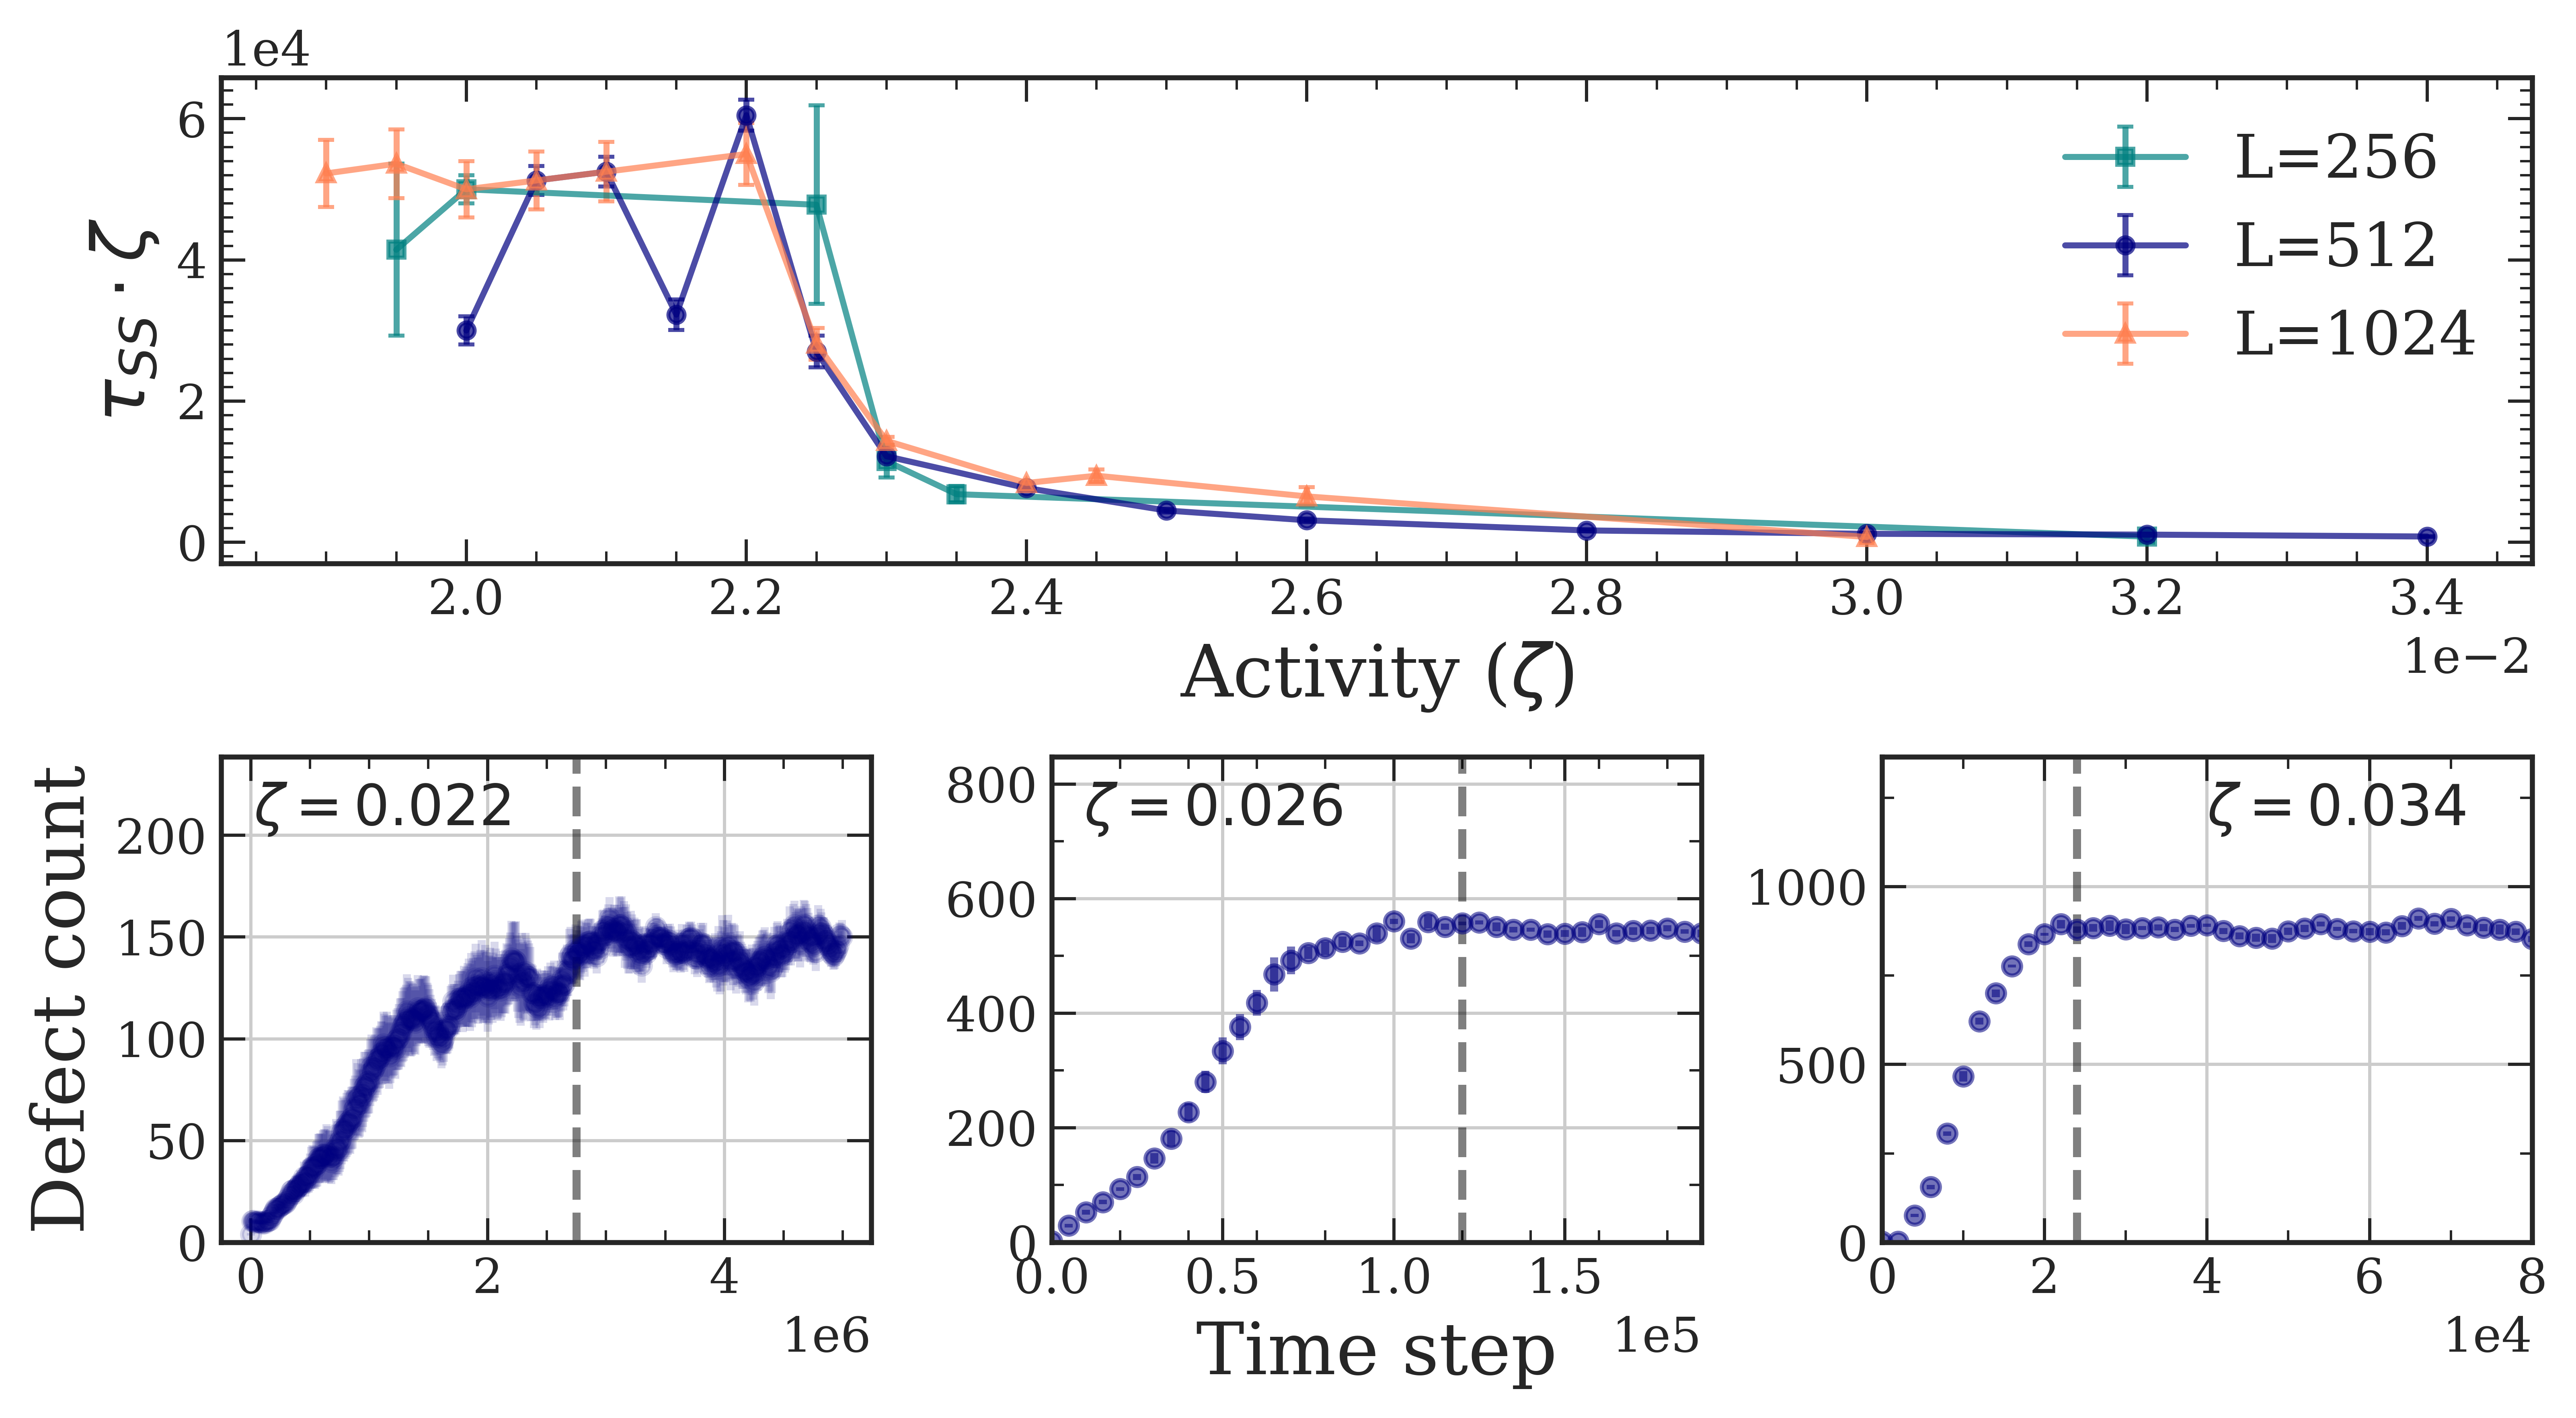

In [ ]:

fig, ax = plt.subplot_mosaic("AAA;BCD", figsize=(9,5))
axes = [ax['A'], ax['B'], ax['C'], ax['D']]
scale_with_activity = True
act_idx_cutoff_512 = 2

X_256 = np.array([0.0195, 0.02, 0.0225, 0.023, 0.0235, 0.032])
Y_256 = np.array([(1.5e6 + 2.75e6)/2, 2.5e6, (1.5e6 + 2.75e6) / 2, 5e5, 2.9e5, 2.5e4])
dY_256 = np.array([np.std([1.5e6, 2.75e6]), 1e5, np.std([1.5e6, 2.75e6]), 1e5, 5e4, 2e4])

X_1024 = np.array([0.019, 0.0195, 0.02, 0.0205, 0.021, 0.022, .0225, 0.023, 0.024, 0.0245, 0.026, 0.03])
Y_1024 = np.array([(2.5e6 + 3e6)/2, (2.5e6 + 3e6)/2, 2.5e6, 2.5e6, 2.5e6, 2.5e6, 1.25e6, (6e5+6.5e5)/2, (3e5+4e5)/2, (3.5e5+4.2e5)/2,(2e5+3e5)/2, 2.5e4])
dY_1024 = np.array([np.std([2.5e6, 3e6]), np.std([2.5e6, 3e6]), 2e5, 2e5, 2e5, 2e5, 1e5, np.std([6e5, 6.5e5]), np.std((3e5+4e5)/2), np.std([3.5e5, 4.2e5]), np.std([2e5, 3e5]), 2e4])


act_list_full = []
for act_list in adm.act_list:
    act_list_full.extend(act_list)
act_list_full.sort()

act_list_full = act_list_full[act_idx_cutoff_512:]
conv_list = np.array([*adm.conv_list[2], *adm.conv_list[1], *adm.conv_list[0]])[act_idx_cutoff_512:]
conv_list_err = np.array([*adm.conv_list_err[2], *adm.conv_list_err[1], *adm.conv_list_err[0]]  )[act_idx_cutoff_512:]

act_p = 1
scaling = 1
conv_list_active = scaling * np.array(act_list_full)**act_p * conv_list
conv_list_active_err = np.array(act_list_full)**act_p * conv_list_err

#fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))
marker_list = ['s', 'o', '^', 'v']

for marker, LX, X, Y, dY in zip(marker_list, [256, 512, 1024], [X_256, act_list_full, X_1024],\
                                 [Y_256, conv_list, Y_1024], [dY_256, conv_list_err, dY_1024]):
    if scale_with_activity:
        Y = np.array(Y) * np.array(X)**act_p
        dY = np.array(dY) * np.array(X)**act_p
    ax['A'].errorbar(X, Y, yerr=dY, lw=1.5, fmt = f'{marker}-', capsize=2, label=f'L={LX}', markersize=4, alpha=.7)# ecolor='teal', elinewidth=1,\

act_crit_idx = act_list_full.index(0.022)
scaling = 0.0005
Y = conv_list[act_crit_idx] * np.exp(- (act_list_full[act_crit_idx:] - act_list_full[act_crit_idx]) / scaling)

ax['A'].set(xlabel=rf'Activity ($\zeta$)', ylabel=r'$\tau_{SS} \cdot \zeta$',)
ax['A'].legend()
#ax.set_yscale('log')
#ax.grid(True, which = 'both')
ax['A'].xaxis.set_minor_locator(MultipleLocator(5e-4))
ax['A'].yaxis.set_minor_locator(MultipleLocator(2e3))


act_list = [0.022, 0.026, 0.034]
#axes[1].set_xlim(0,3)
axes[2].set(xlim = (0,1.9e5))#, xticks = np.linspace(0,5e5,5))#, xticklabels = np.linspace(0,5e5,5))
axes[3].set(xlim = (0,8e4))#, xticks = np.linspace(0,5e5,5))#, xticklabels = np.linspace(0,5e5,5))
plot_defects_per_activity(adm, activity=act_list[0], ax = ax['B'], Ndataset=2, alpha=.15)
plot_defects_per_activity(adm, activity=act_list[1], ax = ax['C'], Ndataset=1)
plot_defects_per_activity(adm, activity=act_list[2], ax = ax['D'], Ndataset=0)
axes[1].set(ylabel = 'Defect count')
axes[2].set(xlabel = 'Time step')
xtick_list = [5e5, 2e4, 1e4]
ytick_list = [50, 100, 250]
for i, ax in enumerate(axes[1:]):
   # ax.set(xlabel = 'Time step', ylabel = 'Defect count')
  #  ax.grid()
    xpos = 0.05 if i<2 else 0.5
    ax.text(xpos, 0.95, rf'$\zeta = {act_list[i]}$', transform=ax.transAxes, fontsize=14, verticalalignment='top', fontweight='normal')
  #  ax.text(rf'$\zeta = {act_list[i]}$', x=0.5, y=0.9, transform=ax.transAxes, fontsize=12)    
    ax.xaxis.set_minor_locator(MultipleLocator(xtick_list[i]))
    ax.yaxis.set_minor_locator(MultipleLocator(ytick_list[i]))

fig.tight_layout()
fig.dpi = 720

525000
325000
225000
125000


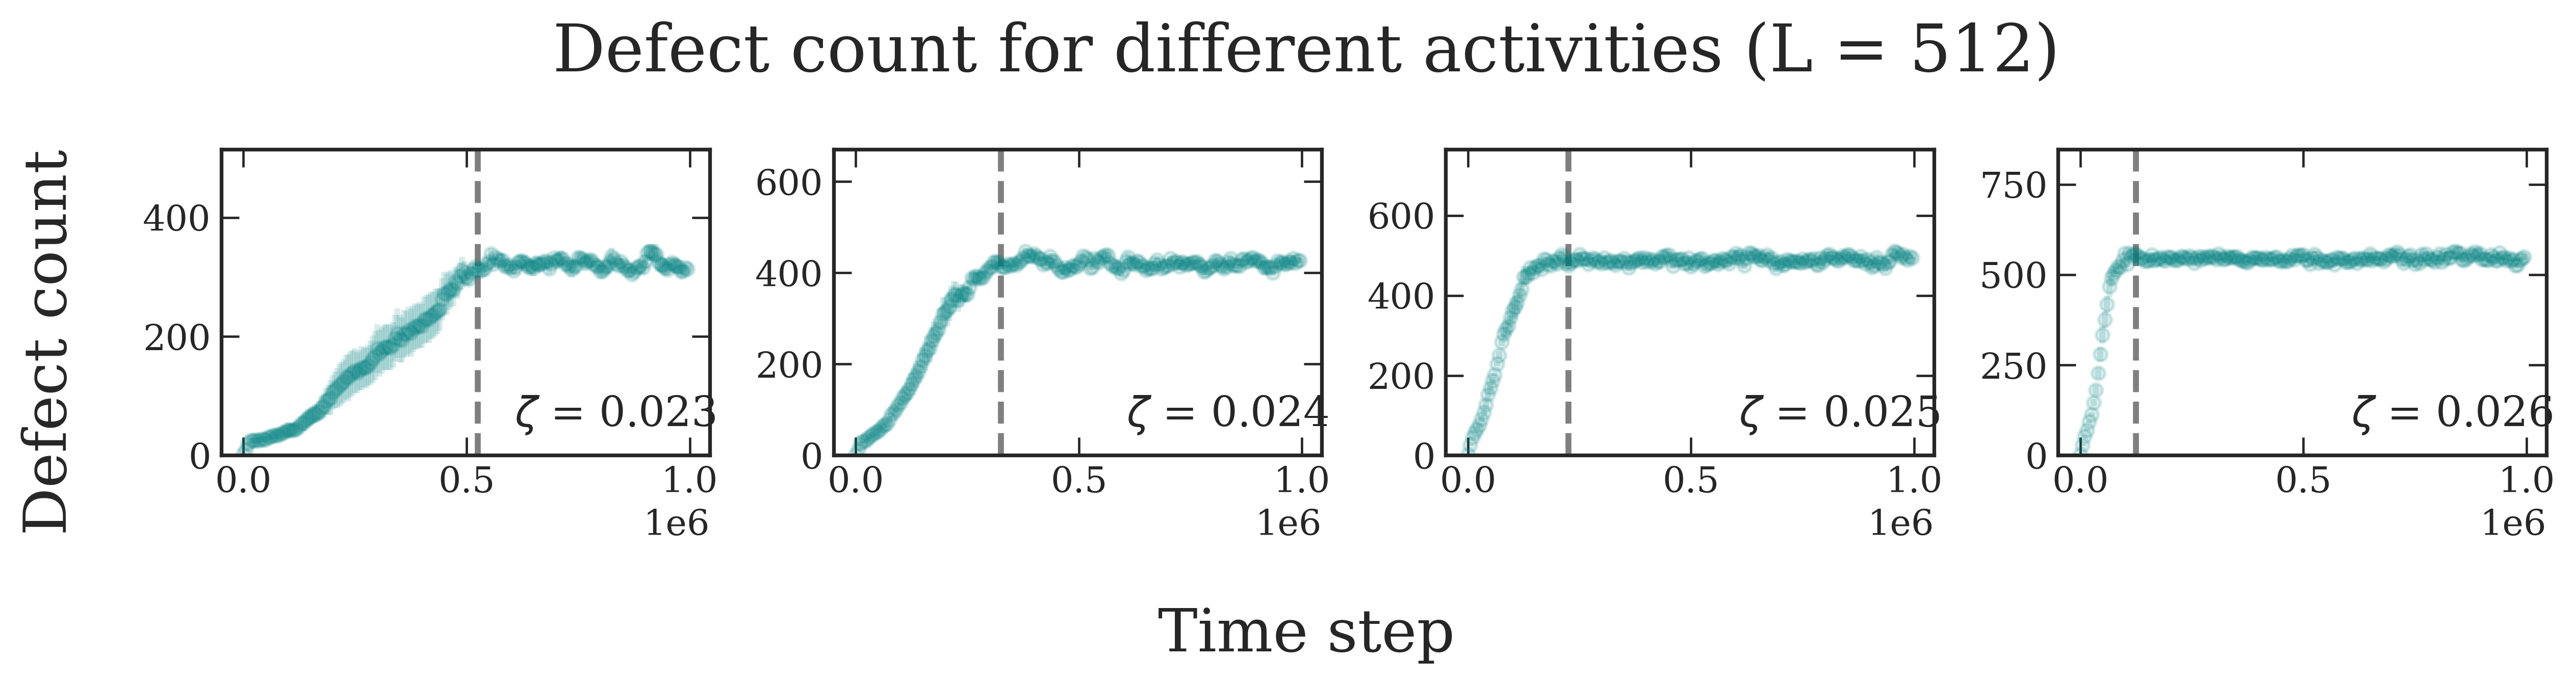

(<Figure size 5040x1260 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

In [ ]:
block_len = 10
stationarity_dict = dict(interval_len = block_len, Njump = block_len, Nconverged = 80, max_sigma_dist = .5)

adm.plot_defects_per_activity(Ndataset=1, estimate_stationarity=True, stationarity_dict=stationarity_dict)

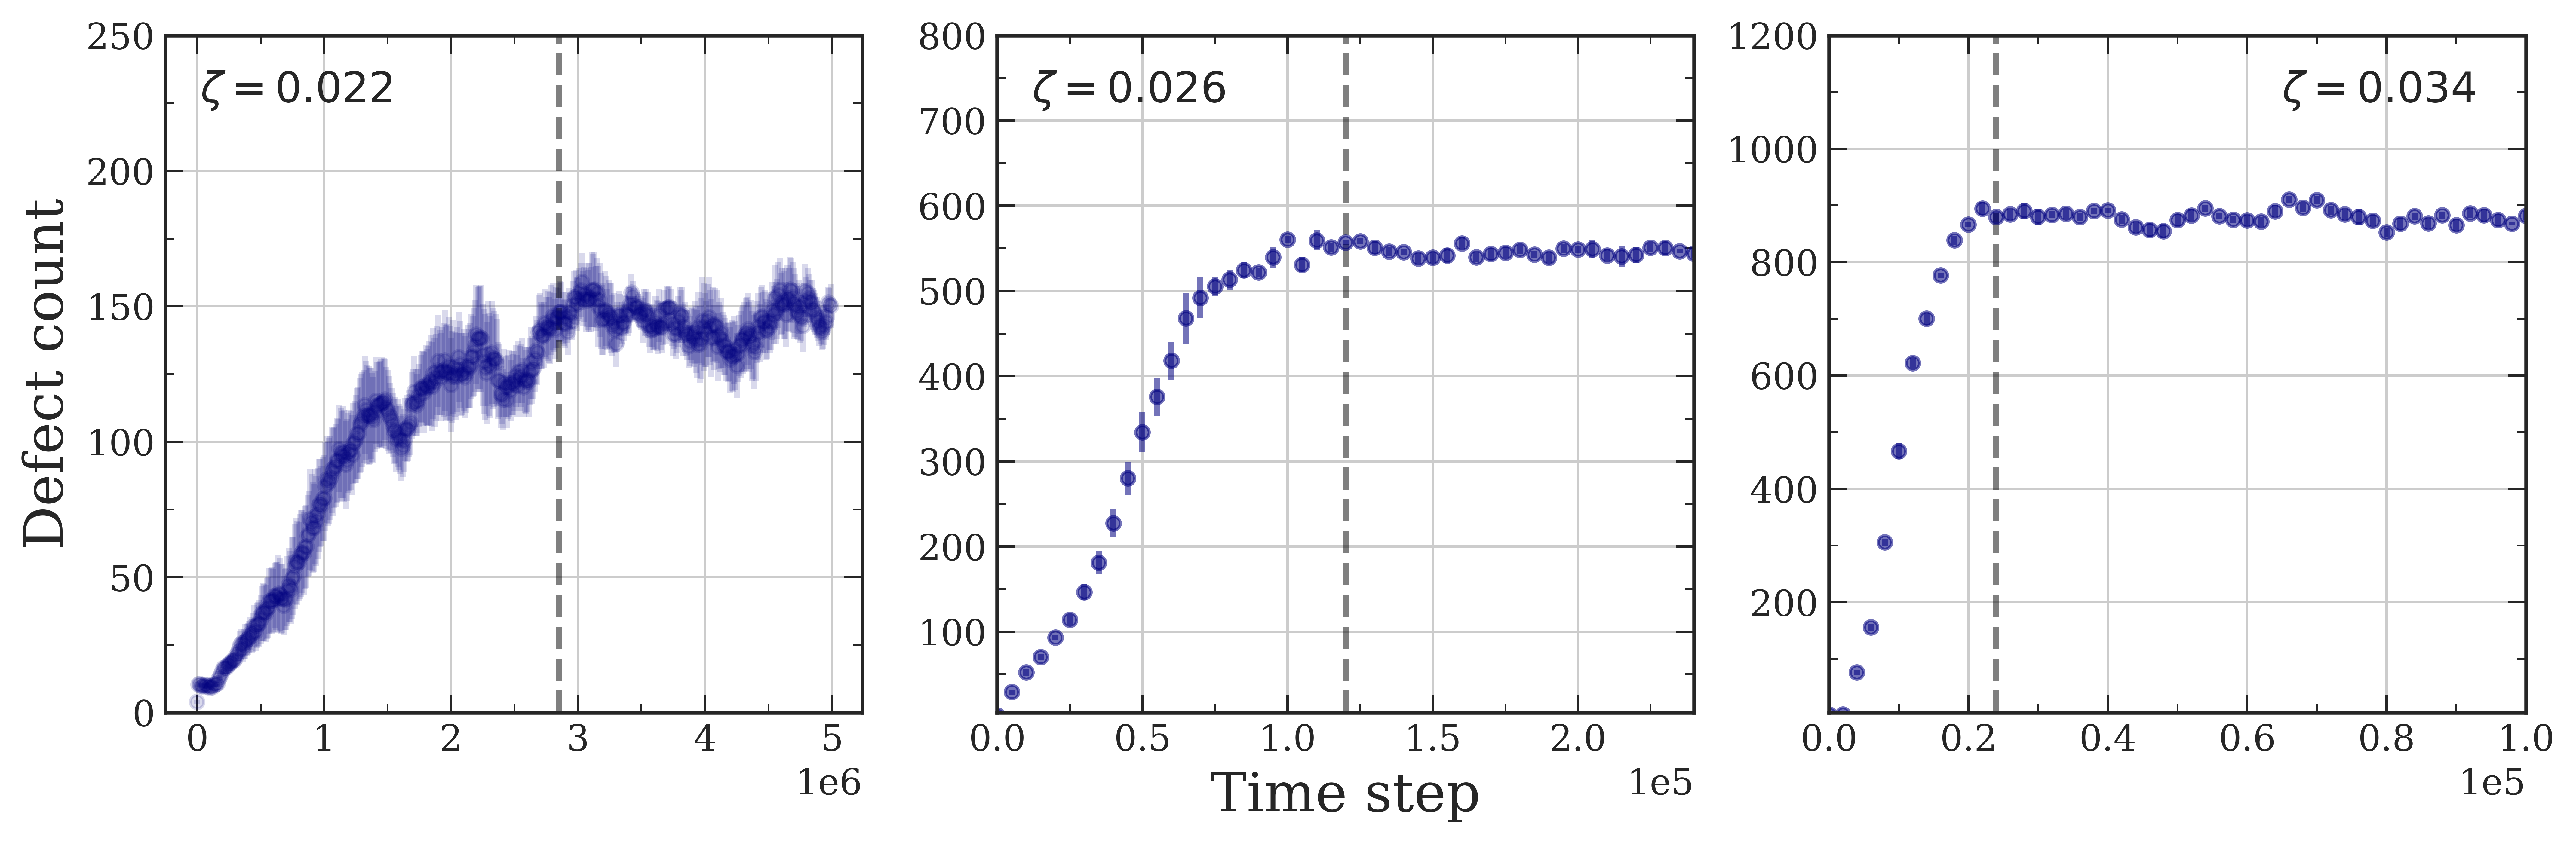

In [31]:

fig, ax = plt.subplot_mosaic("BCD", figsize=(12,4))
axes = [ax['B'], ax['C'], ax['D']]
scale_with_activity = True
act_idx_cutoff_512 = 2

act_list = [0.022, 0.026, 0.034]
#axes[1].set_xlim(0,3)
axes[1].set(xlim = (0,2.4e5))#, xticks = np.linspace(0,5e5,5))#, xticklabels = np.linspace(0,5e5,5))
axes[2].set(xlim = (0,10e4))#, xticks = np.linspace(0,5e5,5))#, xticklabels = np.linspace(0,5e5,5))

plot_defects_per_activity(adm, activity=act_list[0], ax = ax['B'], Ndataset=2, alpha=.15)
plot_defects_per_activity(adm, activity=act_list[1], ax = ax['C'], Ndataset=1)
plot_defects_per_activity(adm, activity=act_list[2], ax = ax['D'], Ndataset=0)
axes[0].set(ylabel = 'Defect count')
axes[1].set(xlabel = 'Time step')
#axes[1].set(ylim = (5,700))
ylim_list = [(0, 250), (5, 800), (5, 1200)]
xtick_list = [5e5, 2.5e4, 1e4]
ytick_list = [25, 50, 100]
for i, ax in enumerate(axes):

    ax.set(ylim = ylim_list[i])
    xpos = 0.05 if i<2 else 0.65
    ax.text(xpos, 0.95, rf'$\zeta = {act_list[i]}$', transform=ax.transAxes, fontsize=14, verticalalignment='top', fontweight='normal') 
    ax.xaxis.set_minor_locator(MultipleLocator(xtick_list[i]))
    ax.yaxis.set_minor_locator(MultipleLocator(ytick_list[i]))

fig.tight_layout()
fig.dpi = 720
fig.savefig('data\\na512sd\\defects_per_activity.png', dpi=720, bbox_inches='tight', pad_inches=0.1)